# HOMEWORK 2 OF ALGORITHMICS METHOD OF DATA MINING

This homework is the made by the collective effort of the following people: <br>
Can Lin 1994375, <br>
Amirhosein Dalvand 2056639, <br>
Giorgio Taramanni 1961217, <br>
Gabriele Cabibbo 2196717


<strong> Implementations of custom function are inside myFunctions.py

In [1]:
from myFunctions import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import nltk
from nltk.corpus import stopwords
import re
import scipy.stats as stats
from scipy.stats import normaltest, shapiro, mannwhitneyu, zscore, f_oneway
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns


In [ ]:
# Read the CSV
df = my_read_csv()

Getting all the rows


### <strong>[RQ1] Before diving deep into the dataset provided, it's crucial to understand its structure and main features. Data scientists usually take the first step of performing an Exploratory Data Analysis (EDA). What can you say about our dataset? Please perform an EDA and summarize the dataset's key characteristics using visualizations and tabular summaries.   </strong>

### <strong> First analysis </strong>

The dataset in question concerns all the reviews left by the users in 2021 on Steam, a famous online platform through which it is possible to purchase video games. Our Dataset is characterized by about 21 million rows, that corresponds to the number of reviews, and 22 column, which are the variable we'll use to analyze this data.

The columns are: 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'

Starting from here we can see that some of them has some qualitative information, like 'review', 'language', 'app_id', 'review_id', 'author.steamid'. Some of them even if are numerical data, contain qualitative information, such as IDs, which are used to identify a specific element. Others are discrete numeric variables, like 'votes_helpful', 'votes_funny', 'author.num_games_owned', 'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 'author.playtime_at_review'. There are some particular, the boolean variables, whose information are described using true or false, here are some examples: 'recommended',  'steam_purchase', 'received_for_free', 'written_during_early_access'. Lastly, there are some temporal variable, which are set in a particulare way, for this reason we have modify them in a date-time variable, making them more readable: 'timestamp_created', 'timestamp_updated' and 'author.last_played'.

To continue we can see the principal characteristics for the most interesting columns.

In [3]:
df.head(5)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


In [4]:
df.columns

Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [5]:
df.dtypes

app_id                            string[python]
app_name                                  object
review_id                         string[python]
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                 datetime64[ns]
recommended                                 bool
votes_helpful                              int64
votes_funny                                int64
weighted_vote_score                      float64
comment_count                              int64
steam_purchase                              bool
received_for_free                           bool
written_during_early_access                 bool
author.steamid                    string[python]
author.num_games_owned                     int64
author.num_reviews                         int64
author.playtime_forever                  float64
author.playtime_last_two_weeks           float64
author.playtime_at_r

In [6]:
my_describe(df)

,count,mean,min,25%,50%,75%,max,std,median,cv,range
timestamp_created,21612444,2018-12-08 14:12:18.685626880,2010-11-19 20:17:16,2017-11-05 21:32:33.750000128,2019-07-06 12:41:23,2020-05-16 19:05:06.249999872,2021-01-23 18:24:47,NaN,NaN,NaN,NaN
timestamp_updated,21612444,2019-01-13 20:00:36.493523200,2010-11-19 20:17:16,2017-11-26 11:40:51.249999872,2019-10-25 17:41:26.500000,2020-06-05 08:35:28.500000,2042-05-11 00:59:57,NaN,NaN,NaN,NaN
votes_helpful,21612444.0,406993.955915,0.0,0.0,0.0,1.0,4398046511106.0,1337897570.75068,0.0,328726.643555,4.398047e+12
votes_funny,21612444.0,127384.559935,0.0,0.0,0.0,0.0,4294967295.0,23390015.24756,0.0,18361.734938,4.294967e+09
weighted_vote_score,21612444.0,0.165677,0.0,0.0,0.0,0.483052,0.995987,0.243485,0.0,146.963374,9.959868e-01
comment_count,21612444.0,0.131114,0.0,0.0,0.0,0.0,4893.0,2.204552,0.0,1681.406193,4.893000e+03
author.num_games_owned,21612444.0,1017612.82084,0.0,22.0,61.0,145.0,4398046511619.0,2115401652.995528,61.0,207878.832663,4.398047e+12
author.num_reviews,21612444.0,407002.581722,1.0,2.0,4.0,10.0,4398046511108.0,1337897570.748514,4.0,328719.676688,4.398047e+12
author.playtime_forever,21612442.0,16163.740151,0.0,1246.0,4324.0,15031.0,3744943.0,37532.858856,4324.0,232.204047,3.744943e+06
author.playtime_last_two_weeks,21612442.0,155.920164,0.0,0.0,0.0,0.0,27039.0,731.524442,0.0,469.166029,2.703900e+04


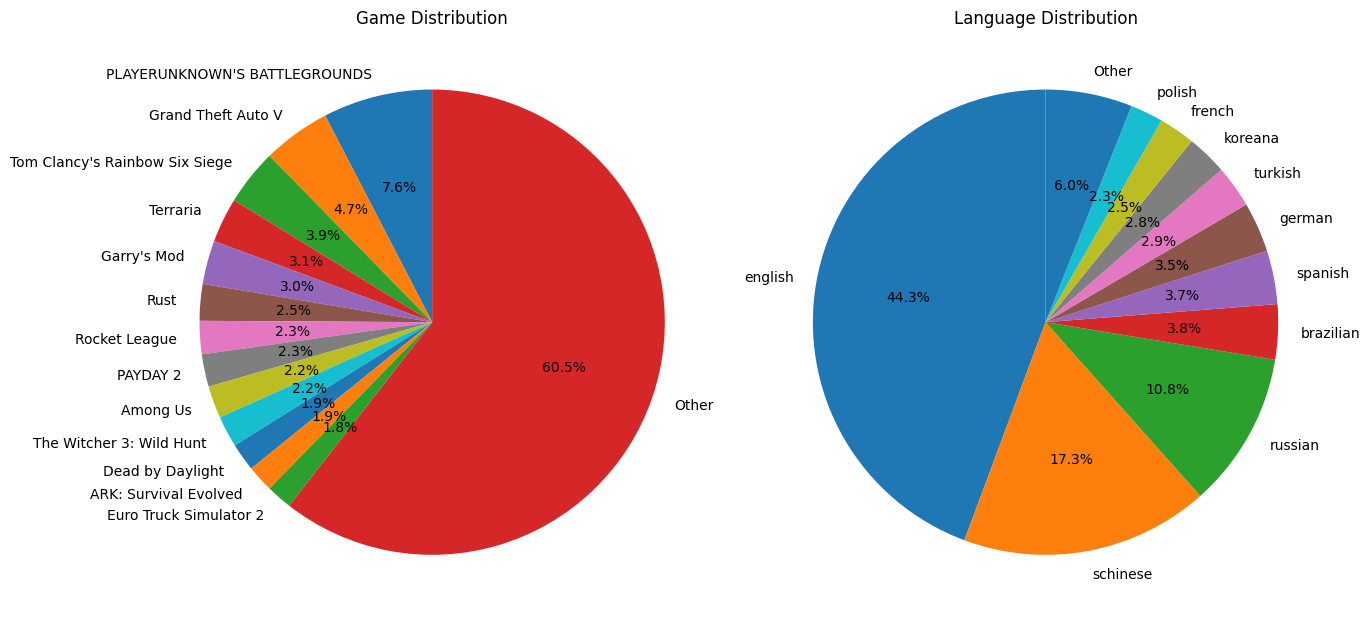

In [7]:
show_game_and_language_percentage(df)

In the recent pie charts, we observe the most reviewed games being **PUBG**, **GTA V**, and **Rainbow 6 Siege**, alongside the most used languages: **English**, **Simplified Chinese**, and **Russian**. It's interesting to note that only **Simplified Chinese** is more representative of a specific region (Mainland China), while **English** is taught in schools in most countries and **Russian** reviews may come from users in ex-USSR block countries; this highlights that reviews in English and Russian are not necessarily written by native speakers, whereas a review in Chinese is likely authored by a Chinese person.

### <strong> [RQ2] Let's explore the dataset by analyzing the distribution of reviews across different applications.

### 2.1 - Identify which applications have the highest and lowest number of reviews.

In [8]:
min_and_max_game_reviews(df)

'Neon Hardcorps' was reviewed least times, it was reviewed 200 times.
'PLAYERUNKNOWN'S BATTLEGROUNDS' was reviewed most times, it was reviewed 1644255 times.


### 2.2 - Plot the number of reviews for each application in descending order. What insights can you draw from the plot?

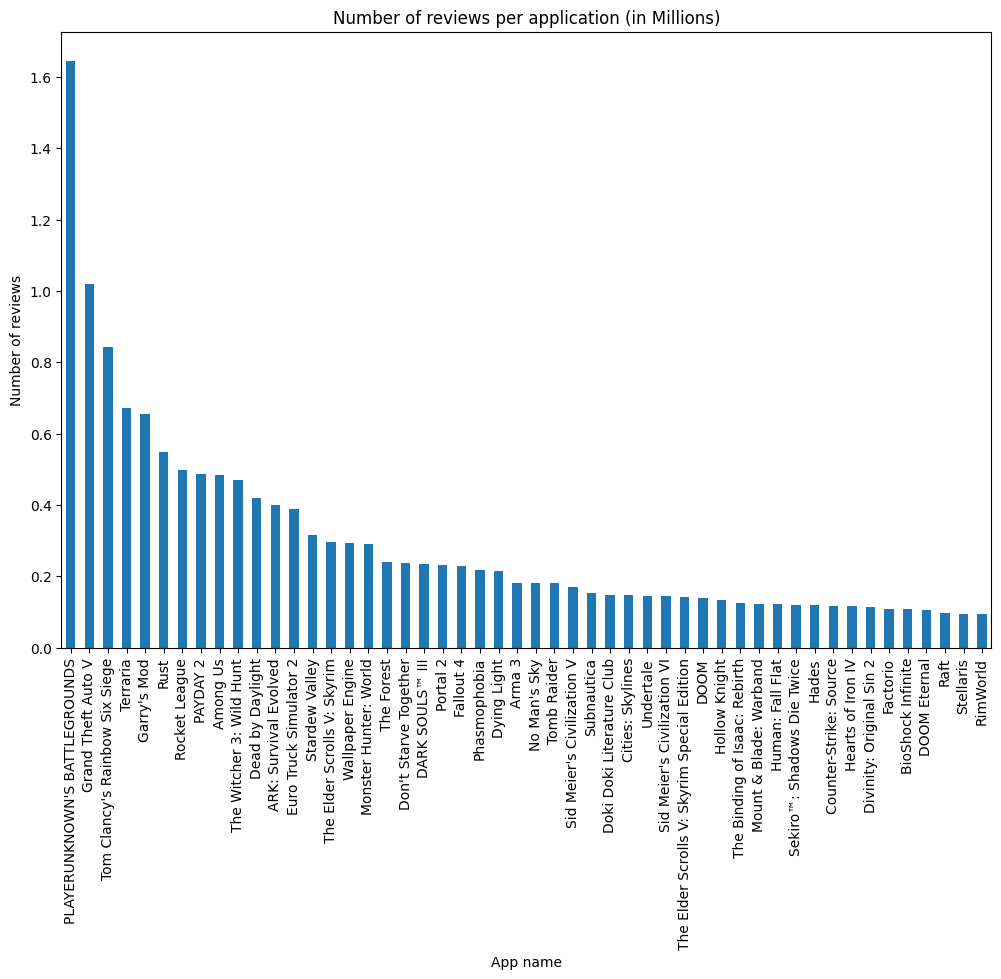

In [9]:
review_per_game(df) #showing only top 50

For the graphs portraying the names of the applications we'll display only a part of the total 315 applications to make the plots more understandable. <br>
The graph contained in the image above portrays the number of reviews received by each of the 50 most reviewed applications. It shows that 'PLAYERUNKNOWN'S BATTLEGROUNDS' received the most reviews, more than 1.6 Millions (around 7.5% of the total number of reviews in the dataset). 

### 2.3 - For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.

551250 users purchased 'Garry's Mod', it corresponds to 84.1% of its total users. 
15.9% of the users received 'Garry's Mod' for free, that is 104274 users.

905288 users purchased 'Grand Theft Auto V', it corresponds to 88.8% of its total users. 
11.2% of the users received 'Grand Theft Auto V' for free, that is 113828 users.

1372721 users purchased 'PLAYERUNKNOWN'S BATTLEGROUNDS', it corresponds to 83.5% of its total users. 
16.5% of the users received 'PLAYERUNKNOWN'S BATTLEGROUNDS' for free, that is 271534 users.

527762 users purchased 'Terraria', it corresponds to 78.4% of its total users. 
21.6% of the users received 'Terraria' for free, that is 145053 users.

702505 users purchased 'Tom Clancy's Rainbow Six Siege', it corresponds to 83.4% of its total users. 
16.6% of the users received 'Tom Clancy's Rainbow Six Siege' for free, that is 139413 users.



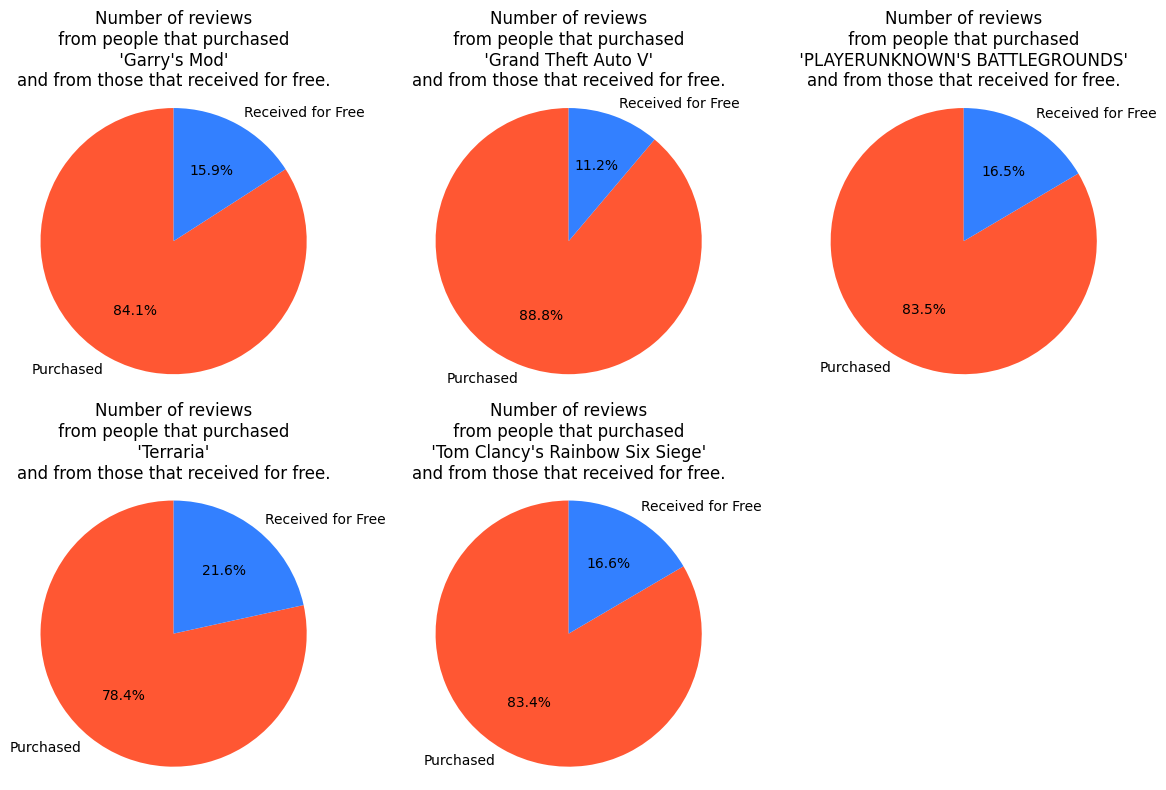

In [10]:
top5_reviews_analysis(df)

Observing the pie plots portraying the percentage of users that purchased each of the 5 most reviewed games compared to the proportion of those who received them for free, we can notice how each game was purchased by around 80% of its total users, while aproximately 20% of the users received it for free. 

The game that, in terms of percantage, received the most reviews by users that purchased it is 'Grand Theft Auto V', that received from them 88.8% of the total number of reviews, while 'Terraria' has the least percentage and received the 78.4% of the total reviews by people that purchased it.

### 2.4 - Which applications have the most and the least user recommendations? Summarize your findings.

In [11]:
min_max_game_reccomendations(df)

'Neon Hardcorps' was recommended least times, it was recommended 89 times.
'PLAYERUNKNOWN'S BATTLEGROUNDS' was recommended most times, it was recommended 886417 times.


'PLAYERUNKNOWN'S BATTLEGROUNDS' is the most recommended app, while 'Neon Hardcorps' is the least recommended one.
We can notice how this are the two applications that received the most and least reviews.

### 2.5 - Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.


The p-value associated with the Shapiro-Wilk test to verify that the distribution of the number of recommendations is normal is equal to 6.90284366039153e-29, with associated value 0.4987992765098369.
The p-value associated with the Shapiro-Wilk test to verify that the distribution of the review score is normal is equal to 7.672187360353954e-21, with associated value 0.7668660085625324.

The Spearman test coefficient between the number of recommendations and the applications' review scores is equal to 0.4455852122552181.
The p-value associated to the hypothesis test to verify that the two variables are correlated is equal to 9.046432753901785e-17.


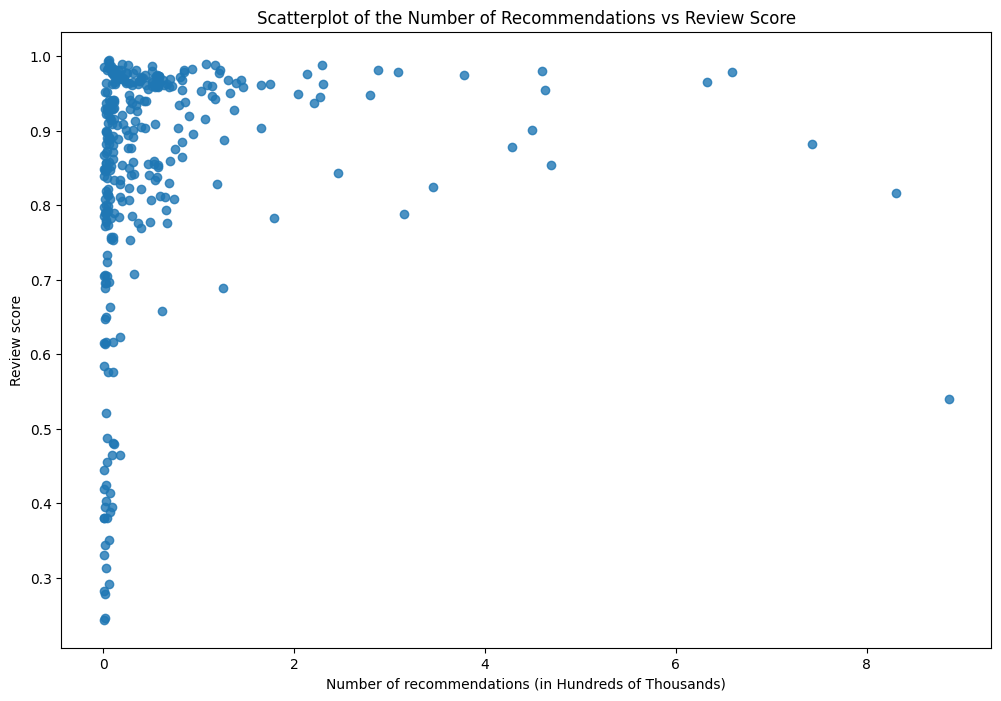

In [12]:
correlation_reccomendations(df)

Before analyzing the correlation between the number of recommendations an application received and its review score, we have to check if these two variables are normally distributed. To do this, we'll use the Shapiro-Wilk test.

Since the p-value associated with this hypothesis test is really close to zero for both the distribution of the number of recommendations and the distribution of the review score, we can reject the null hypothesis that these two variables are normally distributed.

Because these two variables aren't normally distributed, we can't use the most common correlation coefficient, which is the Pearson correlation coefficient. Instead, we'll verify the presence of a correlation between the number of recommendations and the review score using Spearman's ρ, which works well even for non-normally distributed variables.

In our case, we find that ρ is around 0.45, and the p-value related to the hypothesis test performed to verify the validity of the relation is very close to zero. This means that we can reject the null hypothesis that the two variables are independent. Thus, when the number of recommendations increases, the review score tends to increase.

The scatterplot in the figure above reinforces our thesis, showing that as the number of recommendations increases, the review score tends to increase. Nevertheless, since our ρ is not really close to 1, the relationship between the two variables is weak, and we can see that this relationship isn't linear.

### <strong>[RQ3] Understanding when users are most active in submitting reviews can help identify peak engagement periods

### 3.1 - Plot the number of reviews submitted each month and describe any trends.

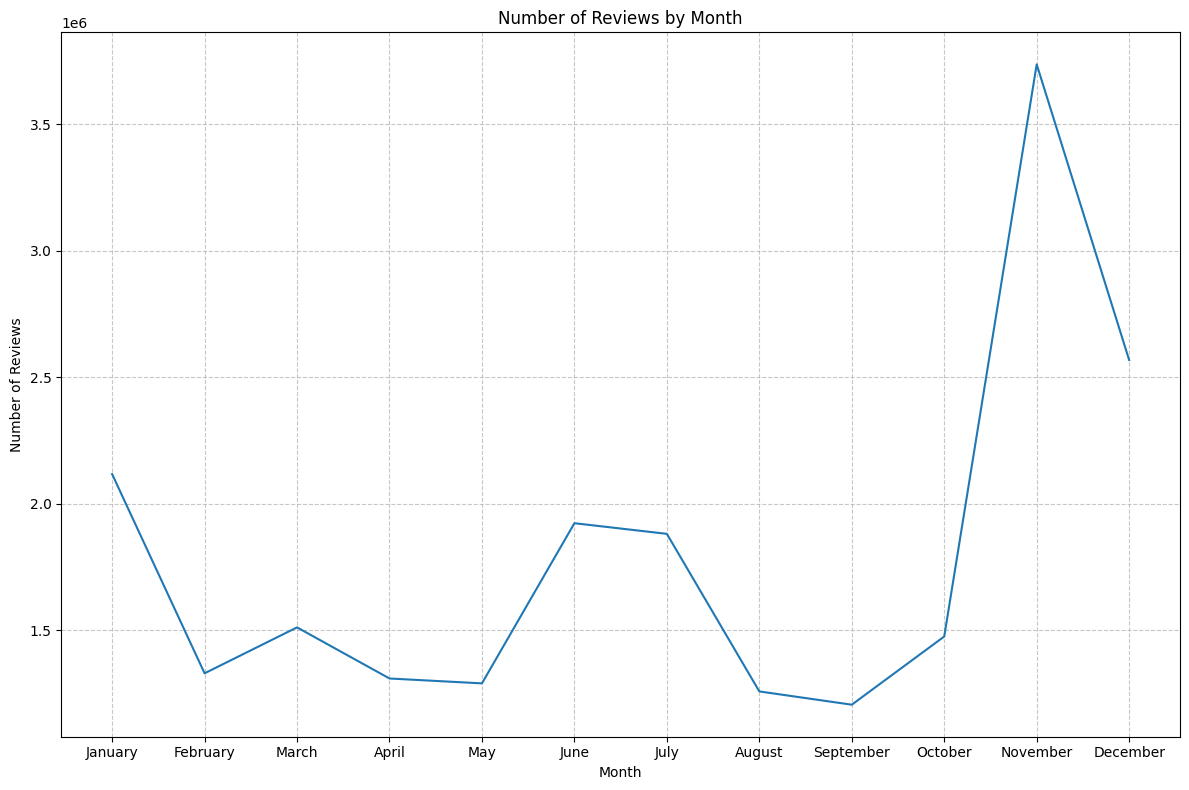

In [13]:
show_monthly_trends(df) #function to show the monthly trends of reviews

### 3.2 - Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.<br> </strong>
The graph shows a seasonal pattern in game reviews, with a peak in November and a smaller peak in June. This suggests that game reviews are influenced by seasonal factors.

    - November Peak: The highest point in the graph is in November, likely due to the release of major game titles during the holiday season. This is a common trend in the gaming industry, with many studios aiming to release their biggest games during this time to capitalize on holiday spending.
    
    - June Peak: The smaller peak in June could be attributed to the summer break for students, when many people have more free time to play games. This is a common phenomenon across various entertainment industries, with an increase in activity during summer vacations.

Overall, the graph suggests that game reviews are influenced by both holiday season and school breaks, highlighting the seasonality of the gaming industry.

### 3.3 - Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity. </strong> <br>



In [14]:
best_days_of_year(df)

,month,day,count
0,11,26,323858
1,11,23,313415
2,11,24,294389
3,6,29,292455
4,11,27,281740
5,11,25,270981
6,11,22,262118
7,6,30,212866
8,11,28,199527
9,7,1,188233


The data clearly indicates that peak activity occurs during certain holidays, such as Christmas, as well as during significant events like the start of the school break. Additionally, November stands out as a particularly notable month for game releases, further contributing to the increased activity during this time.

### 3.4 - What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.

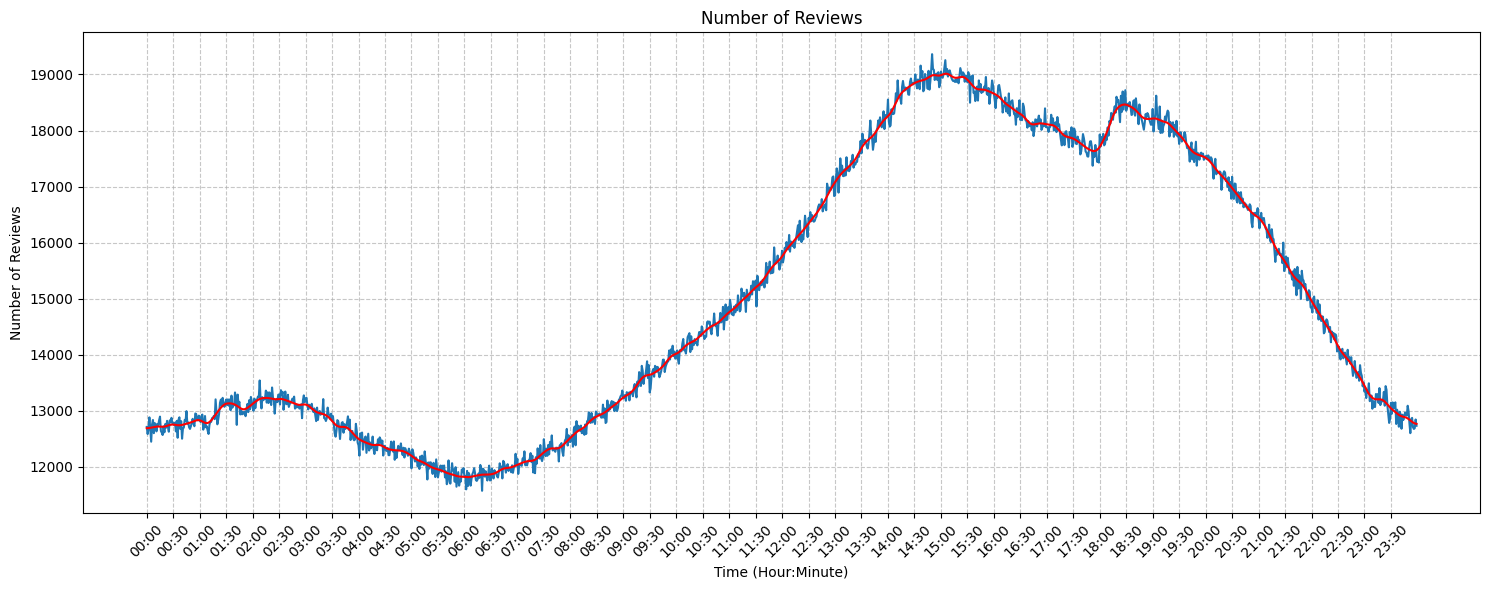

In [15]:
show_daily_trends(df)

It looks like that most people write a review in the afternoon/evening with a spike around 14:00-19:00

### 3.5 - Create a function that accepts a list of time intervals and plots the number of reviews for each interval. </strong>

the function I created is called "ploTimeInterval", the actual implementation can be seen in myFunctions.py

### 3.6 - Use the function to plot the number of reviews for the following time intervals:</strong>

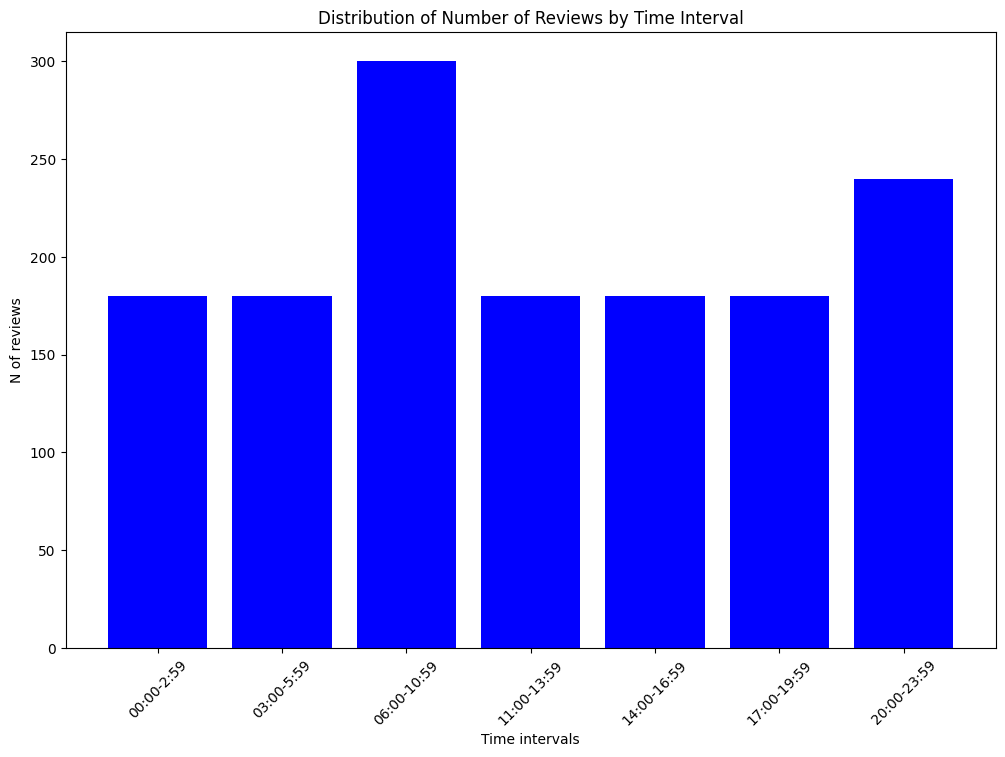

In [16]:
interval = [('00:00', '03:00'), ('03:00', '06:00'), ('06:00', '11:00'),
            ('11:00', '14:00'), ('14:00', '17:00'), ('17:00', '20:00'), ('20:00', '24:00')]
plotTimeInterval(df,interval) 

we can see that the timeslot with the most reviews in between 6:00 and 10:00

### <strong> [RQ4] Investigating whether users who spend more time using an application give higher or lower ratings.

### 4.1 - Analyze the relationship between the amount of time a user has spent on an application and their review score.

First of all, we created a score that is able to measure the percentage of recommended reviews over the total of reviews per game. This score is called review_score_game, and actually gives an idea of ​​how much a game is recommended by users who have played it.

In [17]:
my_game_scores(df)

recommended,app_name,False,True,total_reviews,review_score_games
0,20XX,261,3349,3610,0.927701
1,A Hat in Time,661,34318,34979,0.981103
2,A Short Hike,50,5797,5847,0.991449
3,A Way Out,1175,9766,10941,0.892606
4,ARK: Survival Evolved,84766,315243,400009,0.788090
...,...,...,...,...,...
310,XCOM 2,8904,52732,61636,0.855539
311,Yakuza 0,2001,29774,31775,0.937026
312,Youtubers Life,3055,9566,12621,0.757943
313,theHunter: Call of the Wild™,9788,57452,67240,0.854432


In [18]:
sp = score_by_playtime(df)
sp

,app_name,author.playtime_forever,review_score_games
0,The Witcher 3: Wild Hunt,1909.0,0.980522
1,The Witcher 3: Wild Hunt,2764.0,0.980522
2,The Witcher 3: Wild Hunt,1061.0,0.980522
3,The Witcher 3: Wild Hunt,5587.0,0.980522
4,The Witcher 3: Wild Hunt,217.0,0.980522
...,...,...,...
21747371,Half-Life: Alyx,432.0,0.986869
21747372,Half-Life: Alyx,3296.0,0.986869
21747373,Half-Life: Alyx,2654.0,0.986869
21747374,Half-Life: Alyx,210.0,0.986869


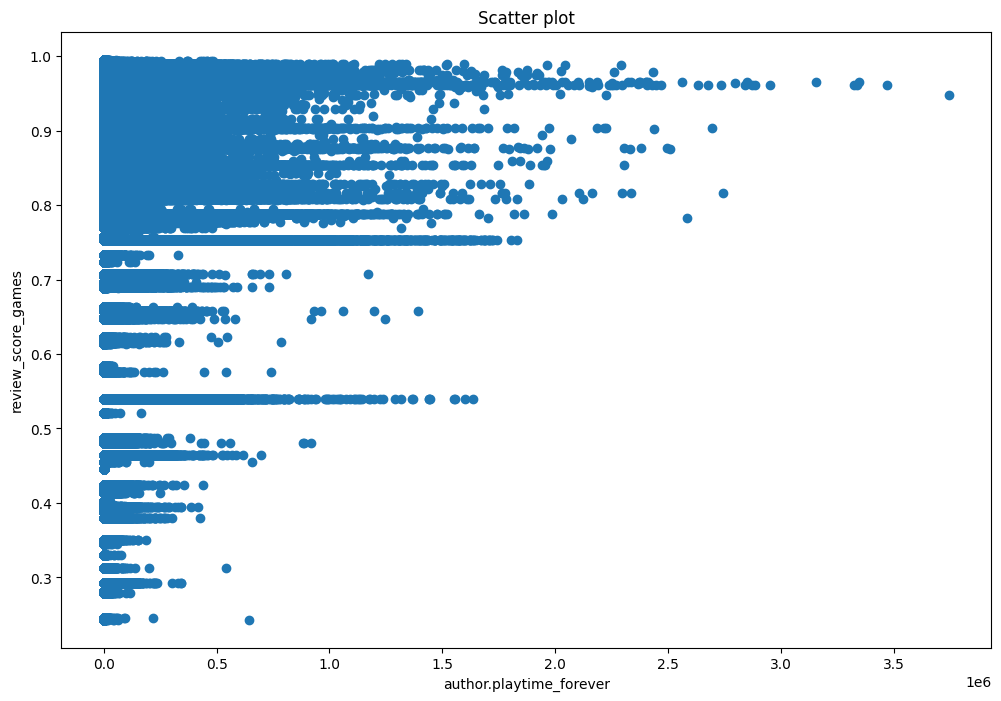

In [19]:
show_score_by_playtime(sp)

The review_score_games is a continuous variable that describes a score of a group, in this case the score for a game. It is not recommended to calculate the correlation with a continuous variable such as the time spent playing. For the same reason the scatter plot is not a great choice to visualize that, but still looks interesting to observe a quite clear trend in the relationship between review_score_games and the time that an user has spent on a game. Most of the reviewers in the left part of the plot, have played games that had obtained scores of all kinds, from the highest to the lowest. An interesting trend is evident when increasing the time spent playing, the lowest scores decrease in frequency, until they become almost only 1 for the players who played the most. An explenation could be that, to invest a not very large portion of user time it is not necessary to play games that are considered the best, while if the user wants to spend much of his time playing a game, it's way more important that it's worth, so games with higher scores will be preferred.
We cane use the ANOVA to compare the means of the time spent on a game dividing groups by game scores.

In [20]:
score_by_playtime_stat(sp)

F-statistic: nan
P-value: nan
There are no significant differences between the means of the categories of review_score_games.


So our first impression get observing the plot is confirmed. <br>
Let's now create another score, the review_score_author, that measure the percentage of recommended reviews over the total of reviews per author. It gives an idea about how much an user is inclined to recommend the games he reviews.

In [21]:
author_scores = author_scores(df)
author_scores

recommended,author.steamid,False,True,total_reviews,review_score_author
0,76561197960265730,0.0,1.0,1.0,1.0
1,76561197960265745,0.0,2.0,2.0,1.0
2,76561197960265747,0.0,1.0,1.0,1.0
3,76561197960265778,0.0,2.0,2.0,1.0
4,76561197960265781,0.0,4.0,4.0,1.0
...,...,...,...,...,...
12406555,76561199133107792,0.0,1.0,1.0,1.0
12406556,76561199133134170,0.0,1.0,1.0,1.0
12406557,76561199133159367,0.0,1.0,1.0,1.0
12406558,76561199133180413,0.0,1.0,1.0,1.0


In [22]:
sp2 = score_by_playtime2(df, author_scores)
sp2

,author.steamid,author.playtime_forever,review_score_author
0,76561199095369542,1909.0,1.000000
1,76561198949504115,2764.0,1.000000
2,76561199090098988,1061.0,1.000000
3,76561199054755373,5587.0,1.000000
4,76561199028326951,217.0,1.000000
...,...,...,...
21747371,76561197967033932,432.0,0.666667
21747372,76561198046495482,3296.0,1.000000
21747373,76561198176379749,2654.0,1.000000
21747374,76561198041763187,210.0,0.500000


The review_score_author is a continuous variable that describes a score of a group, now the users differentiated by propensity to recommend games in their reviews. In this case the scatter plot doesn't show clear trends. Let's use the ANOVA.

In [23]:
stat_author_scores(sp2)

F-statistic: nan
P-value: nan
There are no significant differences between the means of the categories of review_score_author.


The ANOVA hilights that there are statistically significant differences between the group means, suggesting that the author score significantly affects playtime.

### 4.2 - Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

To analyze the reviews of users who play the most, users above the 80th percentile were taken into consideration to compare their distribution with the one of users below the median.

In [24]:
comparison_game , comparison_author = comparison_game_author_score(df, sp, sp2)
# we took above 80th quantile as veteran and belowe 50th quantile as newbie, we can also put different parameters in this function

In [25]:
comparison_game

,Mean,Median,Standard Deviation
Over 80% Author_score (Veteran),0.883870,1.0,0.266981
Under 50% Author_score (Newbie),0.863733,1.0,0.277796


In [26]:
comparison_author

,Mean,Median,Standard Deviation
Over 80% Game_score (Veteran),0.874134,0.921504,0.131803
Under 50% Game_score (Newbie),0.874140,0.923091,0.131802


Just looking at this statistics, it is immediately observed that there are no differences for the author_score, so it's possible to think that the distribution of users over the 80% and users under the 50% is almost identical. About the Game_score, even if the statistics are really close, there is a slight difference that highlight that the population above 80% has a slightly higher average than the one below 50% (difference ~ 0.02). Same for the standard deviation, where a minimal difference is observed, while the median is the same for both. This analysis shows that for the review_score_author the time spent on an application can influece it. 

### 4.3 - Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.

Using the same partition of the dataset used before we define a new variable, the Exerience of an user. User that has spent more time on games than the 80% of the dataset are Veteran, who has spent less time than the 50% of the population is New.

In [27]:
result_80_perc_game = sp[filter_greater_than_quantile(df, 0.8)]
result_50_perc_game = sp[filter_less_than_quantile(df,0.5)]
result_80_perc_game['experience']='Veteran'
result_50_perc_game['experience']='New'

result_game=pd.concat([result_80_perc_game,result_50_perc_game])
result_game;


/tmp/ipykernel_882369/3730513226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_80_perc_game['experience']='Veteran'
/tmp/ipykernel_882369/3730513226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_50_perc_game['experience']='New'


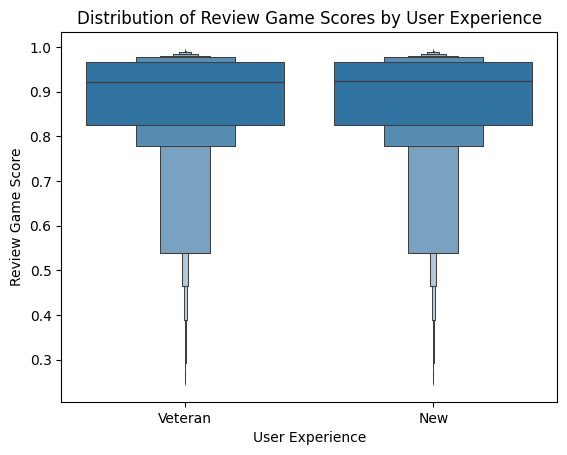

In [28]:
sns.boxenplot(x='experience', y='review_score_games', data=result_game)
plt.title('Distribution of Review Game Scores by User Experience')
plt.xlabel('User Experience')
plt.ylabel('Review Game Score')
plt.show()

In [29]:
result_80_perc_author = sp2[filter_greater_than_quantile(df, 0.8)]
result_50_perc_author = sp2[filter_less_than_quantile(df,0.5)]

result_80_perc_author['experience']='Veteran'
result_50_perc_author['experience']='New'

result_author=pd.concat([result_80_perc_author,result_50_perc_author])
result_author

/tmp/ipykernel_882369/474493035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_80_perc_author['experience']='Veteran'
/tmp/ipykernel_882369/474493035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_50_perc_author['experience']='New'


,author.steamid,author.playtime_forever,review_score_author,experience
18,76561198065591528,23329.0,1.000000,Veteran
25,76561198040190687,20168.0,1.000000,Veteran
43,76561198141110905,20193.0,0.500000,Veteran
67,76561198853276137,14936.0,1.000000,Veteran
72,76561198403635390,59008.0,1.000000,Veteran
...,...,...,...,...
21747360,76561198048409355,710.0,1.000000,New
21747363,76561198239986092,743.0,0.500000,New
21747364,76561197968100319,238.0,1.000000,New
21747371,76561197967033932,432.0,0.666667,New


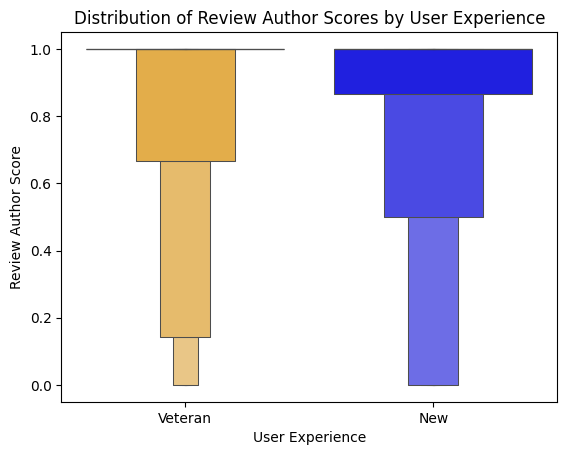

In [30]:
sns.boxenplot(x='experience' ,y='review_score_author' ,data=result_author, hue = 'experience' , palette={'New': 'blue', 'Veteran': 'orange'})
plt.title('Distribution of Review Author Scores by User Experience')
plt.xlabel('User Experience')
plt.ylabel('Review Author Score')
plt.show()

Here are the Boxplot of the distribution of the population of Veteran and New users. The first graph is about the Game_score, as we saw in the 4.2, analysing the statistics about Veteran and New the distribution gave the impression of being similar, and that impression is perfectly confermed by the Boxplot. There is almost no difference betwenn Veteran and New users about the Game_score.
Different situation for the Author_score, of which we had already observed differences in the statistics between New and Veteran. Again, our impression are confermed by the plot, in this case a boxenplot, ideal to show the distribution of a population. Looking at it, catches the eye that the Veteran distribution is more concentrated on higher scores, while the New distribution is scattered mainly among the medium-low scores.
Statistical tests follow to confirm or deny the hypothesis.

In [ ]:
p_value_new_users = jarque_bera(result_50_perc_author['review_score_author']).pvalue
p_value_veteran_users = jarque_bera(result_80_perc_author['review_score_author']).pvalue
if p_value_new_users and p_value_veteran_users < 0.05:
    print("p-value (New Users):", p_value_new_users, 'not Normal distribution')
    print("p-value (Veteran Users):", p_value_veteran_users, 'not Normal distribution')
else:
    print("p-value (New Users):", p_value_new_users)
    print("p-value (Veteran Users):", p_value_veteran_users)


p-value (New Users): 4.3406598822260506e-216 not Normal distribution
p-value (Veteran Users): 5.329702146200163e-224 not Normal distribution


/home/pavka/ADM/ADMenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10808936.
  res = hypotest_fun_out(*samples, **kwds)
/home/pavka/ADM/ADMenv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 4323369.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
p_value_new_users = jarque_bera(result_50_perc_game['review_score_games']).pvalue
p_value_veteran_users = jarque_bera(result_80_perc_game['review_score_games']).pvalue
if p_value_new_users and p_value_veteran_users < 0.05:
    print("p-value (New Users):", p_value_new_users, 'not Normal distribution')
    print("p-value (Veteran Users):", p_value_veteran_users, 'not Normal distribution')
else:
    print("p-value (New Users):", p_value_new_users)
    print("p-value (Veteran Users):", p_value_veteran_users)

p-value (New Users): 5.826010356602295e-193 not Normal distribution
p-value (Veteran Users): 1.294168260763854e-195 not Normal distribution


First of all, the Jarque-Bera test was done, to check if the population has a Normal distribution. Using the p-value, it's easy to understand the nature of the distributions. In this case, both the p-value are close to zero, and so their distribution isn't a Normal.
For this reason we choose the Wilcoxon-Mann-Whitney Test, ideal to confront the distribution of 2 not Normal population

In [ ]:
stat, p_value = mannwhitneyu(result_80_perc_author['review_score_author'], result_50_perc_author['review_score_author'])
print("Statistic:", stat)
print("p-value:", p_value)

Statistic: 24674144529217.0
p-value: 0.0


In [34]:
stat, p_value = mannwhitneyu(result_80_perc_game['review_score_games'], result_50_perc_game['review_score_games'])
print("Statistic:", stat)
print("p-value:", p_value)

Statistic: 23364616743443.5
p-value: 0.9073906375851368


The Wilcoxon-Mann-Whitney Test confirms owr analysis. A small p-value means that the probability that the differences between the 2 distribution are random is very low, so in the case of the Author_score a p-value=0 certifies the greater tendency of more experienced users to recommend games compared to less experienced ones. On the other hand, a big p-value as in the Game_score case, means that the probability that the differences between the 2 distribution are random is very high. Gamers, whether experienced or not, play video games evidently without giving much consideration to their 'recommendation index'.

### 4.4 - Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

Our findings revealed that users who spend more time on a game are likely to play those with higher recommendation scores, suggesting they may favor games they consider worthwhile. Additionally, while new and veteran users don’t differ significantly in game scores, veteran users are more inclined to recommend games. This could indicate that experienced users, being more selective, tend to rate the games they choose more positively.

An LLM tool might suggest exploring other factors that could explain these patterns, like game genre, social features, or the frequency of game updates. Each of these factors might influence playtime and review trends. To validate this, we could perform additional statistical tests or subgroup analyses, isolating these variables to confirm their impact. This would deepen our understanding of the connections between playtime, user experience, and recommendations.

## [RQ5] It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

### 5.1 - Determine the ten reviewers with the highest number of reviews in the dataset.

In [35]:
# Find IDs of the top 10 reviewers with respect to the number of reviews present in the dataset
top_reviewers = df.groupby('author.steamid')['review_id'].count().sort_values(ascending=False)[0:10]
print(top_reviewers)

author.steamid
76561198062813911    148
76561198315585536    131
76561198192166873    106
76561198239163744    106
76561198045381877    102
76561198064946151     99
76561198013146396     98
76561198027973295     96
76561197969749884     88
76561197989746995     85
Name: review_id, dtype: int64


### 5.2 - What is the percentage of each language used by these top 10 reviewers when submitting a review?

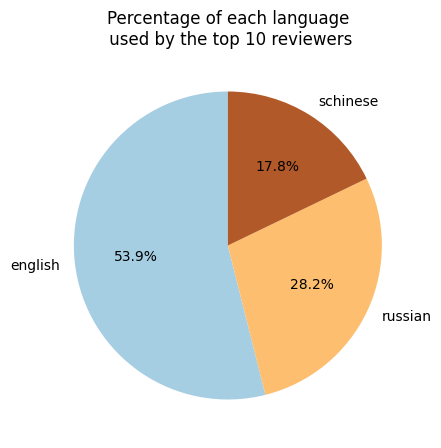

In [36]:
top10_reviewers(df)

More than half of the reviews written by the top 10 reviewers were written in English, while the remaining part was written in semplified Chinese or Russian.

### 5.3 - Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.

<Axes: title={'center': 'Average number of valuable votes received by the top 10 reviewers'}, xlabel='Author ID', ylabel='Average number of valuable votes'>

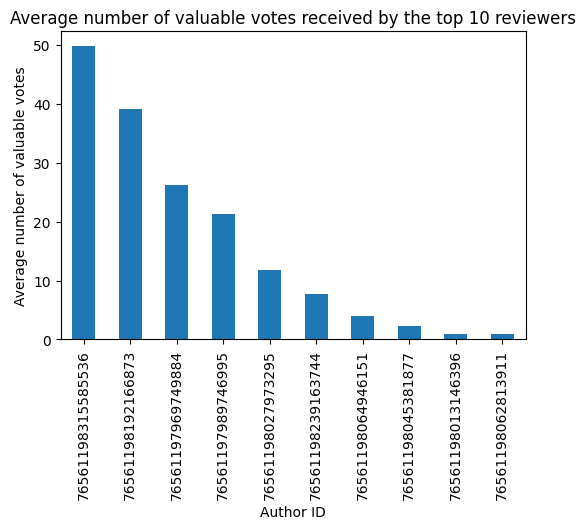

In [37]:
# Find the average number of "helpful" votes received by each review written by the top 10 reviewers 
df_reviewers = df[df['author.steamid'].isin(top_reviewers.index)]
helpful_reviews_top_10 = df_reviewers.groupby('author.steamid').votes_helpful.mean()

# Bar plot
plt.figure(figsize=(6, 4))
helpful_reviews_top_10.sort_values(ascending = False).plot.bar(xlabel = 'Author ID', ylabel = 'Average number of valuable votes', title = 'Average number of valuable votes received by the top 10 reviewers')

The bar plot above shows us that half of the top 10 reviewers wrote actually helpful reviews, having more than 10 'helpful' votes per review on average, while the remaining 5 were probably simply spamming. 

### 5.4 - Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

<Axes: title={'center': 'Number of reviews received by game from the top 10 reviewers'}, xlabel='Game', ylabel='Count'>

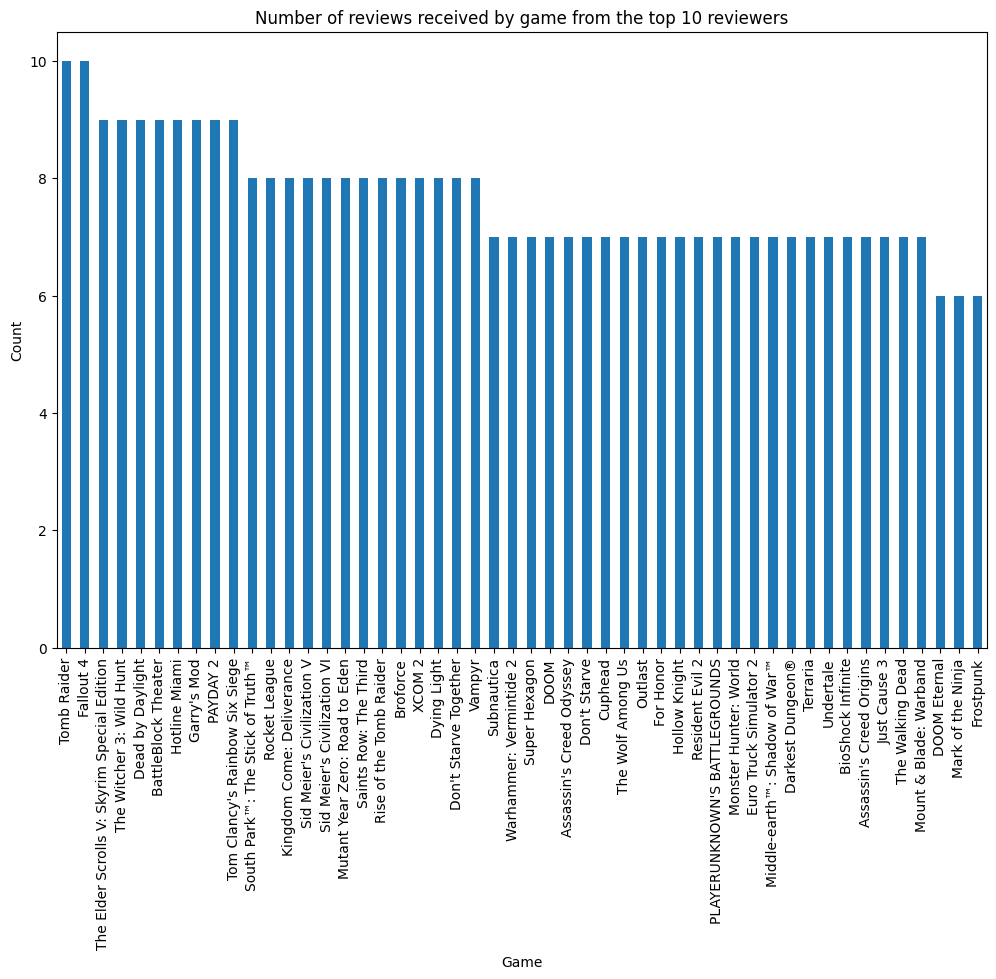

In [38]:
plt.figure(figsize=(12,8))
# Bar plot of the number of reviews each application received from the top 10 reviewers, only for the top 50 games most reviewed by them
df_reviewers['app_name'].value_counts().sort_values(ascending = False)[0:50].plot.bar(ylabel = 'Count', xlabel = 'Game', title = 'Number of reviews received by game from the top 10 reviewers')

### <strong>[RQ6] Let's investigate the behavior of specific groups, specifically focusing on English and Spanish reviewers</strong>

First of all, let's filter the dataframe by english and spanish first

In [39]:
english = df[df['language'] == 'english']
spanish = df[df['language'] == 'spanish']

### 6.1 - Which group is more likely to edit or update their review after submitting it? “English or Spanish!”?

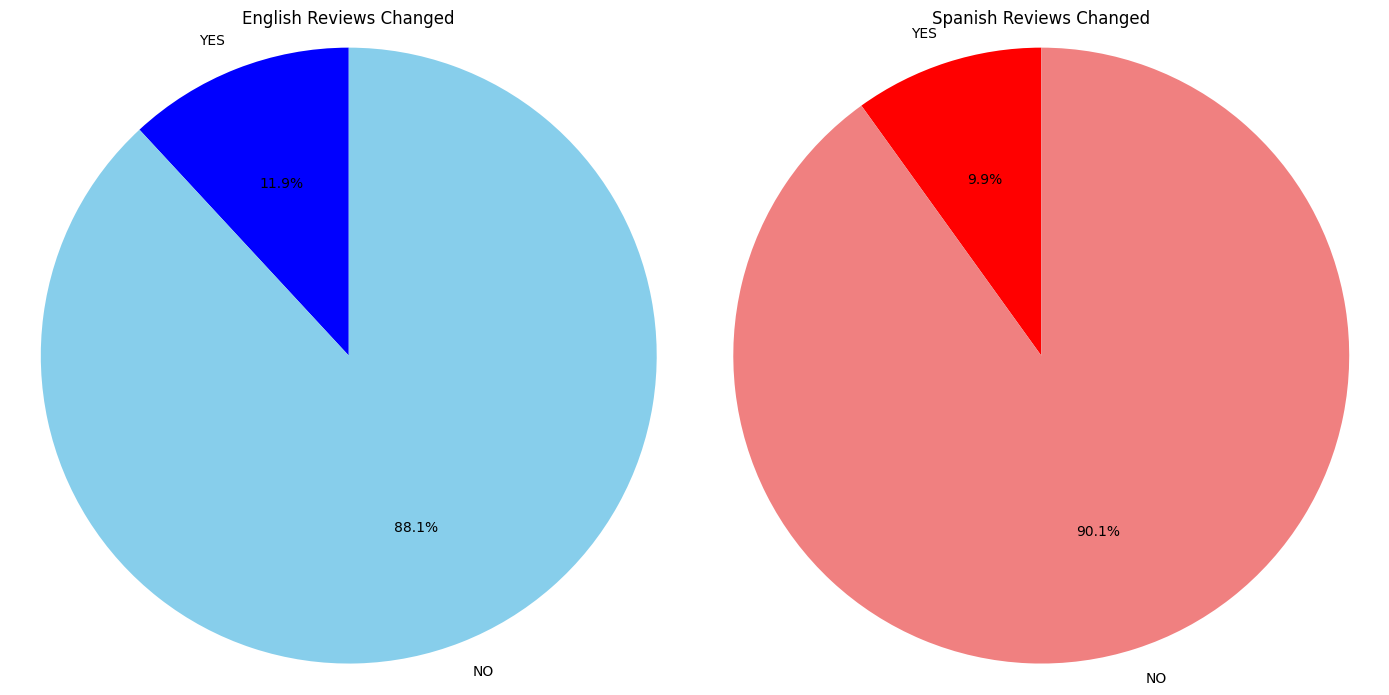

In [40]:
reviews_changed(english,spanish)

It seems that English reviews are more likely to be changed than Spanish reviews.

### 6.2 Provide the average number of games that reviewers from each group have on their Steam accounts and the average number of games for which they write reviews. What can you say about the number you just calculated? 

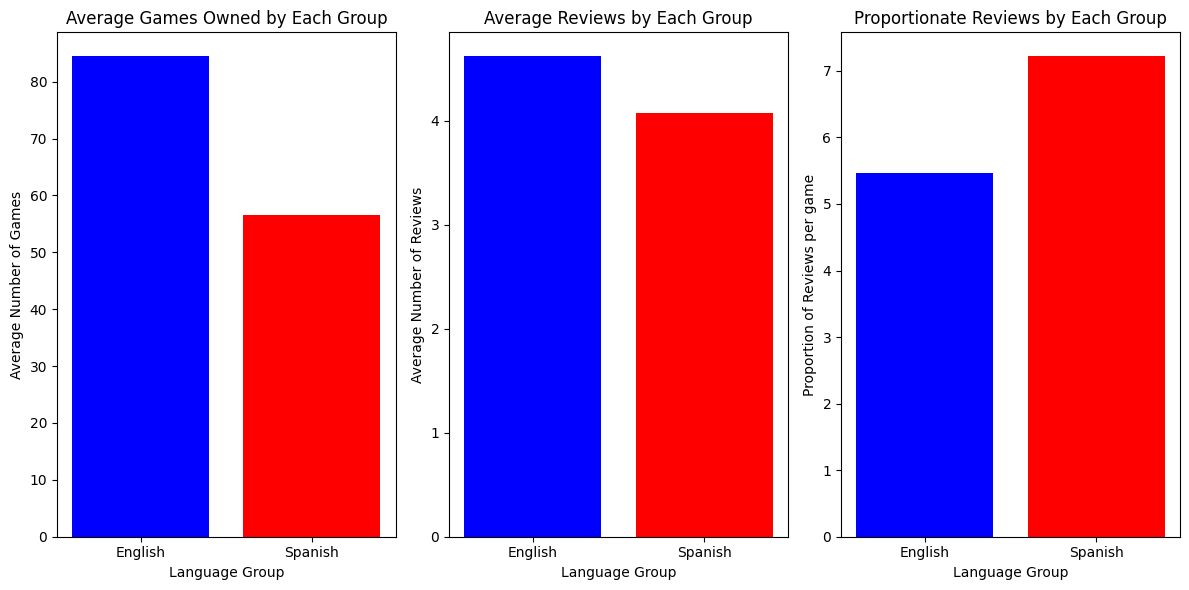

In [41]:
average_game_and_review(english, spanish)

It is evident that game reviews are relatively sparse, with fewer than 10% of games receiving reviews. Interestingly, while English users have higher average numbers for both games owned and reviews written, Spanish users exhibit a higher ratio of reviews per game. This suggests that, despite a lower overall volume of reviews, Spanish users engage more actively in providing feedback relative to their game ownership.

### [RQ7] Certainly, calculating probabilities and conducting statistical tests are essential skills for any data scientist. Let's calculate some intriguing figures.

### 7.1 - What is the probability of submitting a review and receiving at least one helpful vote from other users?

$
P(\text{helpful}) = \frac{N(\text{helpful} \geq 1)}{\Omega}
$


In [3]:
df_helpful=df[df['votes_helpful']>=1]['votes_helpful']
df_helpful.shape[0]

prob_helpful=df_helpful.shape[0]/df.shape[0]
print("the probability of a review having AT LEAST one helpful vote is: ", prob_helpful)

the probability of a review having AT LEAST one helpful vote is:  0.2810148634740245


### 7.2 - Prob of having at least one helpful votes given that you don't recommend the app

$P(\text{helpful} | \text{not recommended}) = \frac{P(\text{helpful} \cap \text{not recommended})}{P(\text{not recommended})}$

In [4]:
inter=df[(df['votes_helpful']>=1) & (df['recommended']==False)]['votes_helpful']
inter.shape[0]

not_rec=df[df['recommended']==False]['recommended']
not_rec.shape[0]

prob_help_not_rec=inter.shape[0]/not_rec.shape[0]
print("probability of a review having AT LEAST one helpful vote given that you DO NOT reccomend it: ", prob_help_not_rec)

probability of a review having AT LEAST one helpful vote given that you DO NOT reccomend it:  0.4844806456521915


### 7.3 - Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”

$P(\text{Helpful} \cap \text{5 Reviews}) = P(\text{Helpful}) \cdot P(\text{5 Reviews})$

In [5]:
ds_sort_by_time=df.sort_values(by='timestamp_created')

ds_sort_by_time['old_reviews']=ds_sort_by_time.groupby('author.steamid').cumcount()
at_least_5=ds_sort_by_time['old_reviews']>=5

prob_at_least_5=at_least_5.sum()/df.shape[0]
print("The probability of a reviewer having at least 5 reviews",prob_at_least_5)

The probability of a reviewer having at least 5 reviews 0.0779592997441659


In [6]:
num_help_at_least_5=ds_sort_by_time[(ds_sort_by_time['old_reviews']>=5) & (ds_sort_by_time['votes_helpful']>=1)]
num_help_at_least_5.shape[0]

prob_help_at_least_5=num_help_at_least_5.shape[0]/df.shape[0]
print("The probability of having at least one helpful given 5 reviews", prob_help_at_least_5)


The probability of having at least one helpful given 5 reviews 0.029475935252857105


In [7]:
prob_help_at_least_5==prob_helpful*prob_at_least_5 #Do they satisfy the independence property?

np.False_

They are not independent. Probably, leaving more reviews users gain experience, giving more useful details and making their reviews more helpful than others.

### 7.4 - We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.


We check for relationship using the Spearman correlation index

In [8]:
cor=df['author.num_reviews'].corr(df['author.num_games_owned'],method='spearman')
cor

np.float64(0.5963446688848445)

We observe a medium-strong correlation between the games owned buy the users and the number of reviews.
Let's analyze more specifically the number of reviews for different groups of users diversified by games owned

In [9]:
median_games_owned=df['author.num_games_owned'].median()
over_median=df[df['author.num_games_owned']>median_games_owned]
under_median=df[df['author.num_games_owned']<=median_games_owned]
stats_over=over_median['author.num_reviews'].describe().round(4)
stats_under=under_median['author.num_reviews'].describe().round(4)
stats_over_df=pd.DataFrame(stats_over)
stats_under_df=pd.DataFrame(stats_under)

In [10]:
pd.options.display.float_format = '{:.2f}'.format

display(pd.concat([stats_over_df, stats_under_df], axis=0, keys=['Statistics Over Median', 'Statistics Under Median']))

author.num_reviews
Statistics Over Median  count         10719340.00
                        mean                17.39
                        std                 47.46
                        min                  1.00
                        25%                  3.00
                        50%                  8.00
                        75%                 18.00
                        max               5236.00
Statistics Under Median count         10893104.00
                        mean            807495.65
                        std         1884512275.69
                        min                  1.00
                        25%                  1.00
                        50%                  2.00
                        75%                  4.00
                        max      4398046511108.00

Probably there is an enormous outlier, lets see other groups and study their statistics

In [11]:
perc_80_games_owned=df['author.num_games_owned'].quantile(0.8)
over_80=df[df['author.num_games_owned']>perc_80_games_owned]

perc_20_games_owned=df['author.num_games_owned'].quantile(0.2)
under_20=df[df['author.num_games_owned']<=perc_20_games_owned]
stats_over_80=over_80['author.num_reviews'].describe().round(4)
stats_under_20=under_20['author.num_reviews'].describe().round(4)
stats_over_80_df=pd.DataFrame(stats_over_80)
stats_under_20_df=pd.DataFrame(stats_under_20)

In [12]:
display(pd.concat([stats_over_80_df, stats_under_20_df], axis=0, keys=['Statistics Over 80%', 'Statistics Under 20%']))

author.num_reviews
Statistics Over 80%  count          4307304.00
                     mean                27.66
                     std                 71.44
                     min                  1.00
                     25%                  5.00
                     50%                 12.00
                     75%                 28.00
                     max               5236.00
Statistics Under 20% count          4533336.00
                     mean                 2.08
                     std                  2.16
                     min                  1.00
                     25%                  1.00
                     50%                  1.00
                     75%                  2.00
                     max                426.00

In [13]:
perc_70_games_owned=df['author.num_games_owned'].quantile(0.7)
over_70=df[df['author.num_games_owned']>perc_70_games_owned]

perc_30_games_owned=df['author.num_games_owned'].quantile(0.3)
under_30=df[df['author.num_games_owned']<=perc_30_games_owned]
stats_over_70=over_70['author.num_reviews'].describe().round(4)
stats_under_30=under_30['author.num_reviews'].describe().round(4)
stats_over_70_df=pd.DataFrame(stats_over_70)
stats_under_30_df=pd.DataFrame(stats_under_30)

In [14]:
display(pd.concat([stats_over_70_df, stats_under_30_df], axis=0, keys=['Statistics Over 70%', 'Statistics Under 30%']))

author.num_reviews
Statistics Over 70%  count          6457439.00
                     mean                22.87
                     std                 59.72
                     min                  1.00
                     25%                  4.00
                     50%                 10.00
                     75%                 24.00
                     max               5236.00
Statistics Under 30% count          6592157.00
                     mean                 2.59
                     std                  2.90
                     min                  1.00
                     25%                  1.00
                     50%                  2.00
                     75%                  3.00
                     max                426.00

In [15]:
display(pd.concat([stats_under_20_df, stats_under_30_df, stats_under_df], axis=0, keys=['Statistics Under 20%', 'Statistics Under 30%','Statistics Under Median']))

author.num_reviews
Statistics Under 20%    count          4533336.00
                        mean                 2.08
                        std                  2.16
                        min                  1.00
                        25%                  1.00
                        50%                  1.00
                        75%                  2.00
                        max                426.00
Statistics Under 30%    count          6592157.00
                        mean                 2.59
                        std                  2.90
                        min                  1.00
                        25%                  1.00
                        50%                  2.00
                        75%                  3.00
                        max                426.00
Statistics Under Median count         10893104.00
                        mean            807495.65
                        std         1884512275.69
                        min                  1.00
                        25%                  1.00
                        50%                  2.00
                        75%                  4.00
                        max      4398046511108.00

In [16]:
display(pd.concat([stats_over_df, stats_over_70_df, stats_over_80_df], axis=0, keys=['Statistics Over Median', 'Statistics Over 70%','Statistics Over 80%']))

author.num_reviews
Statistics Over Median count         10719340.00
                       mean                17.39
                       std                 47.46
                       min                  1.00
                       25%                  3.00
                       50%                  8.00
                       75%                 18.00
                       max               5236.00
Statistics Over 70%    count          6457439.00
                       mean                22.87
                       std                 59.72
                       min                  1.00
                       25%                  4.00
                       50%                 10.00
                       75%                 24.00
                       max               5236.00
Statistics Over 80%    count          4307304.00
                       mean                27.66
                       std                 71.44
                       min                  1.00
                       25%                  5.00
                       50%                 12.00
                       75%                 28.00
                       max               5236.00

In [17]:
pd.reset_option('display.float_format')

The statistics of different group confirm the positive correlation between games owned and number of reviews, the mean are increasing as you analyze groups with more games owned. The only group that does not correspond to our hypothesis is the Under Median games owned, lets look for the outlier.

In [18]:
df.loc[df['author.num_reviews']==np.max(df['author.num_reviews'])]

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
13093698,271590,Grand Theft Auto V,62108069,latam,wen juego alv,2020-01-19 21:39:05,2020-01-19 21:39:05,True,0,0,...,True,False,False,76561198103272004,40,4398046511108,17966.0,0.0,1689.0,2020-12-24 23:17:20


Found it, we can just look a good percentile of the distribution of games owned and compute again the correlation to see if the outlier affects too much

In [19]:
df['author.num_reviews'].quantile(0.98)

np.float64(68.0)

In [20]:
df_per_cor=df[['author.num_reviews','author.num_games_owned']].copy()
df_per_cor=df_per_cor[df_per_cor['author.num_reviews']<100]

#dataset_per_cor.loc[dataset_per_cor['author.num_reviews']==np.max(dataset_per_cor['author.num_reviews'])]

corr_review_game=df_per_cor['author.num_reviews'].corr(df_per_cor['author.num_games_owned'],method='spearman')
corr_review_game

np.float64(0.5859732901040204)

The correlation has not changed, so we can expect that, regardless of the outliers, users who own more games tend to leave more reviews. As further confirmation, we can visualize the distributions of the groups through boxplots and compare them.

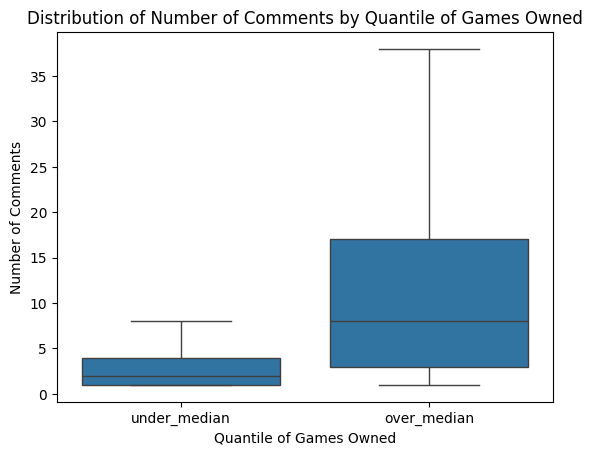

In [21]:
sns.boxplot(data=df,x=['under_median' if x < median_games_owned else 'over_median' for x in df['author.num_games_owned']],
    y=df['author.num_reviews'],
    showfliers=False 
)
plt.xlabel('Quantile of Games Owned')
plt.ylabel('Number of Comments')
plt.title('Distribution of Number of Comments by Quantile of Games Owned')
plt.show()

In [22]:
data_for_plot = pd.DataFrame({
    'Category': ['Under20%'] * len(under_20) + 
                ['Under30%'] * len(under_30) + 
                ['Under Med'] * len(under_median) +
                ['Over Med'] * len(over_median)+
                ['Over70%'] * len(over_70) + 
                ['Over80%'] * len(over_80),
    'Reviews': np.concatenate([under_20['author.num_reviews'], under_30['author.num_reviews'], under_median['author.num_reviews'],
                                over_median['author.num_reviews'], over_70['author.num_reviews'], over_80['author.num_reviews']])
})



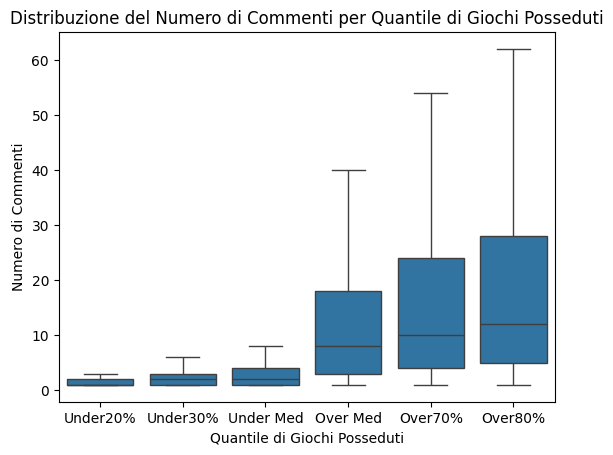

In [23]:
sns.boxplot(data=data_for_plot, x='Category',y='Reviews',showfliers=False)
plt.xlabel('Quantile di Giochi Posseduti')
plt.ylabel('Numero di Commenti')
plt.title('Distribuzione del Numero di Commenti per Quantile di Giochi Posseduti')
plt.show()

The plot perfectly shows our hypothesis, the distributions of the groups with more games owned have higher means, medians and maximum values ​​than all the others with lower percentiles. So yes, users with more games tend to leave more reviews, probably because they have more games to review, and they are more likely to be more active players who often want to share their opinions with the rest of the community.

### 7.5 - Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

#### Answer from ChatGPT

1. Histograms

    - Purpose: Histograms are used to display the distribution of a single continuous variable by showing the frequency of data points within specified intervals (bins).

    - Insights:
        - Data Distribution: Reveals the shape of the data distribution (e.g., normal, skewed, bimodal), which is crucial in understanding the data’s central tendency and spread.
        - Outliers: Highlights the presence of outliers or unusual values.
        - Variability: Shows the spread or variability of the data.
        - Clusters: Identifies clusters or ranges with high data concentration.

    - When to Use: Ideal for visualizing the frequency distribution of large datasets with continuous data, such as age, income, or temperature measurements.

-----------------------------------------------------------------

2. Bar Plots

    - Purpose: Bar plots display the count or frequency of categorical data or can be used to compare values across different categories.

    - Insights:
        - Comparison: Easily compares values across categories to spot the highest or lowest frequency.
        - Patterns: Detects trends across categories (e.g., year-over-year changes, product popularity).
        - Categorical Distribution: Helps analyze the distribution of a categorical variable, such as preference by brand, city, or age group.
        - Proportions: Can also reveal the relative proportion of different categories.

    - When to Use: Best for categorical data or discrete variables, such as survey responses, counts of individuals in groups, or comparing specific groups (e.g., male vs. female, region-wise counts).

-----------------------------------------------------------------

3. Scatterplots

    - Purpose: Scatterplots display the relationship between two continuous variables by plotting individual data points on two axes.

    - Insights:
        - Correlations: Reveals correlations (positive, negative, or none) between variables, which is key for understanding relationships (e.g., height vs. weight, study time vs. grades).
        - Outliers: Makes it easy to detect outliers that don’t follow the general pattern.
        - Trend Patterns: Can show trends or patterns within the data (e.g., linear, exponential, or clusters).
        - Subgroups: Often, subgroups can be identified within the data, suggesting the existence of different behaviors within the population.

    - When to Use: Useful when you have two continuous variables and need to explore potential relationships or correlations.

----------------------------------------------------------------

4. Pie Charts

    - Purpose: Pie charts show the relative proportions of categories within a whole, with each slice representing a category’s percentage.

    - Insights:
        - Proportion Comparison: Allows a quick visual comparison of proportions between categories, helpful in showing major versus minor categories.
        - Part-to-Whole Relationship: Highlights how each category contributes to the total, making it easy to see dominant categories.
        - Category Dominance: Emphasizes dominant categories when one or more categories account for a significant portion of the whole.

    - When to Use: Suitable for showing percentage distributions of a small number of categories (typically fewer than six) where the total equals 100%, like market share, budget allocation, or demographic proportions.

----------------------------------------------------------------

5. Summary of Insights for Statistical Analysis

    Each of these visualizations offers insights critical for statistical analysis:

    - Histograms show data distribution and variability, aiding in assumptions about normality and variability.
    - Bar Plots are essential for understanding categorical distributions and comparing group sizes.
    - Scatterplots are vital for identifying correlations, trends, and outliers, which inform regression analysis and predictive modeling.
    - Pie Charts simplify proportion and part-to-whole analysis, helping identify dominant and minor categories at a glance.

Together, these charts enable a comprehensive approach to data exploration and statistical analysis, from initial distribution checks to in-depth relational insights.

----------------------------------------------------------------

#### Analysis of the answer given by ChatGPT

1. Histograms

I think that the answer given by this LLM is trustworthy but that an histogram isn't enough on its own to show the variability of the data and it should be supported by numerical summaries such as variance and standard deviation. In addition, it should always be supported by some test to prove the real distribution of the data.

-----------------------------------------------------------------

2. Bar plots

I'd add that bar plots can be used to link a continuous variable to a categorical one, for example, we could take another continuous variable in the dataset and compute for it some value of interest for each level of the discrete one to which is linked to. 

ChatGPT omitted an important problem, in my opinion, that can arise from the use of this type of plots, that is that bar plots are easy to misinterpret for scaling reasons, namely we should always plot the bars against a zero-valued baseline otherwise it could lead to distorted interpretations. 

-----------------------------------------------------------------

3. Scatterplot

Scatterplots should always be backed by some numerical summaries, in particular by correlation, or by an interpolated line to show if there are specific trends in the data.
Using just a scatterplot could make us conclude that there is a linear correlation between variables but this can be inaccurate, so checking it by computing a correlation coefficient could make us make a better choice. 

At the same time an interpolated line could help us choosing the right grade of flexibility if, for example, we're trying to predict one of the variables using regression, it could help us choosing the right polynomial degree to use. 

-----------------------------------------------------------------

4. Pie charts

One problem that this LLM's answer doesn't highlight enough is that, when we have a lot of different levels for the categorical variable of interest, a pie chart is not very informative and one thing that we can do to avoid this problem is putting all the levels that don't exceed a certain threshold together, for example creating a new "Other" level, but this will make us lose some information.

### <strong> BONUS

### <strong> Beyond just looking at the numerical ratings, the words users write in their reviews give us valuable insights into how they feel about the application. Let's analyze these review texts using sentiment analysis. </strong>

<strong> Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral. </strong>


<strong>  As we didn't find any suitable tools for other languages, we'll primarily focus on English </strong>

In [5]:
#First we get the languages

english = df[df['language'] == 'english']
#schinese = df[df['language'] == 'schinese']
#russian = df[df['language'] == 'russian']

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
        text = text.lower()  # Convert to lowercase
        tokens = text.split()  # Tokenize
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        return ' '.join(tokens)
    else:
        return ''  # Return empty string for non-string values

english['clean_review'] = english['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/pavka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_76368/4239673988.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english['clean_review'] = english['review'].apply(clean_text)


In [7]:
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound'] 

english['sentiment_score'] = english['clean_review'].apply(get_sentiment)


def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

english['sentiment'] = english['sentiment_score'].apply(classify_sentiment);

/tmp/ipykernel_76368/3378459181.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english['sentiment_score'] = english['clean_review'].apply(get_sentiment)
/tmp/ipykernel_76368/3378459181.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english['sentiment'] = english['sentiment_score'].apply(classify_sentiment);


### Sentiment Analysis Code Description

This code snippet utilizes the `SentimentIntensityAnalyzer` from the `nltk` library to perform sentiment analysis on text data. The process involves two main functions:

1. **get_sentiment**: This function computes the sentiment score of a given text using the `polarity_scores` method, which returns a compound score ranging from -1 (most negative) to +1 (most positive). The compound score is then added to the `english` DataFrame under the `sentiment_score` column.

2. **classify_sentiment**: This function classifies the sentiment score into one of three categories: 
   - **'positive'** if the score is greater than 0,
   - **'negative'** if the score is less than 0,
   - **'neutral'** if the score is exactly 0.

The results are added to the `english` DataFrame in a new column named `sentiment`.


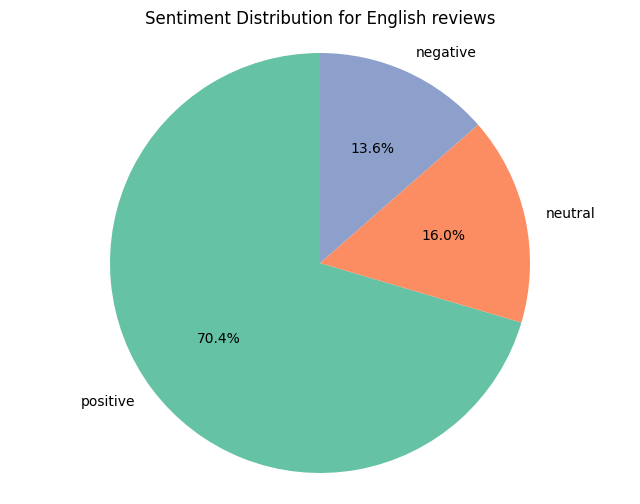

In [8]:
sentiment_counts = english['sentiment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Sentiment Distribution for English reviews')
plt.axis('equal');

### What is the distribution of sentiment across all reviews?

We can see that the majority of the English reviews got a positive score with only a 7.8% of the reviews being negative

### Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.

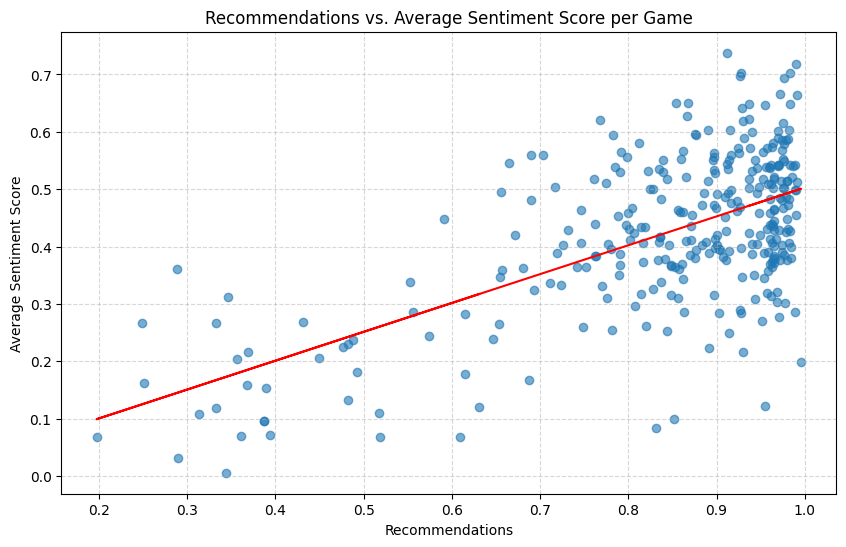

In [ ]:
grouped_games = english.groupby('app_name').agg(
    recommend_sum=('recommended', 'sum'),
    avg_sentiment=('sentiment_score', 'mean'),
    total_reviews=('recommended', 'count')
).reset_index()

grouped_games['recommended_ratio'] = grouped_games['recommend_sum'] / grouped_games['total_reviews']


#Best fitting line
X = grouped_games['recommended_ratio'].values
y = grouped_games['avg_sentiment'].values

m, b = np.polyfit(X, y, 1)

# Generate the line values
y_line = m * X + b




# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(grouped_games['recommended_ratio'], grouped_games['avg_sentiment'], alpha=0.6)
plt.plot(X, y_line, color='red', linestyle='-')
plt.title('Recommendations vs. Average Sentiment Score per Game')
plt.xlabel('Recommendations')
plt.ylabel('Average Sentiment Score')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [44]:
pearsonr(X, y)[0]

np.float64(0.6165281944477822)

The graph illustrates the relationship between the proportion of recommendations (x-axis) and the average sentiment score for each game (y-axis). As the recommendation ratio increases, there is a clear trend showing that the average sentiment score also tends to rise. Conversely, when the recommendation ratio is low, the sentiment score similarly tends to be lower, indicating a strong positive correlation between how frequently a game is recommended and the overall sentiment expressed in its reviews.

### Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.

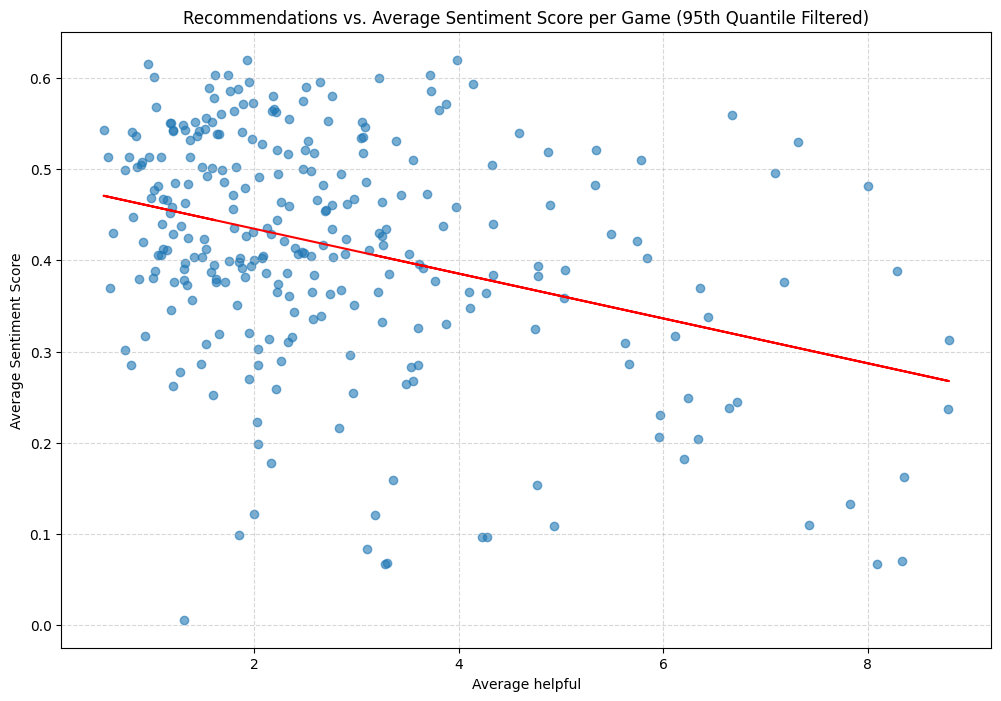

In [55]:


# Group by 'app_name' and calculate sum_helpful and avg_sentiment
grouped_games = english.groupby('app_name').agg(
    sum_helpful=('votes_helpful', 'sum'),
    avg_sentiment=('sentiment_score', 'mean'),
    total_reviews=('recommended', 'count')
).reset_index()


grouped_games['helpful_ratio'] = grouped_games['sum_helpful'] / grouped_games['total_reviews']


# Calculate the qth quantile for sum_helpful and avg_sentiment
quantile_q_helpful = grouped_games['helpful_ratio'].quantile(0.95)    #we cut it because there were some crazy outliners
quantile_q_sentiment = grouped_games['avg_sentiment'].quantile(0.95)

# Filter out any games below the 95th quantile
grouped_games = grouped_games[
    (grouped_games['helpful_ratio'] <= quantile_q_helpful) & 
    (grouped_games['avg_sentiment'] <= quantile_q_sentiment)
]

# Best fitting line calculation using the filtered values
X2 = grouped_games['helpful_ratio'].values
y2 = grouped_games['avg_sentiment'].values

# Calculate the coefficients for the best-fit line
m, b = np.polyfit(X2, y2, 1)

# Generate the line values
y_line = m * X2 + b

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(grouped_games['helpful_ratio'], grouped_games['avg_sentiment'], alpha=0.6)
plt.plot(X2, y_line, color='red', linestyle='-')
plt.title('Recommendations vs. Average Sentiment Score per Game (95th Quantile Filtered)')
plt.xlabel('Average helpful')
plt.ylabel('Average Sentiment Score')
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


In [54]:
pearsonr(X2,y2)[0] #pearson coefficient between helpful and sentiment

np.float64(-0.3418208734396448)

The analysis reveals a surprising negative relationship between the average helpful votes and the sentiment scores. Our suggestion is that reviews with a higher count of helpful votes may often be longer and more technical in nature, adopting a colder and more neutral tone. Consequently, while these reviews receive more recognition for their helpfulness, they may lack the warmth or enthusiasm typically associated with positive sentiment.